# TP4 : Problème aux moindres carrés

L'objectif de ce TP consiste à reconstruire des images préalablement modifiées par une transformation non linéaire bruitée.

<img src="files/exo2.png" width="800" height="600"  >


Soit $I$ une image de taille $n\times m$.
Une transformation non linéaire notée $T$ est réalisée sur chaque niveau de gris $I_{ij}$ du pixel $(i,j)$ de l'image $I$. L'image modifiée après transformation est notée $J$, dont les éléments sont définis par :
\begin{equation}
\forall i\in \{1,..,n\}, \forall j \in\{1,..,m\}, \qquad J_{ij}=T(\alpha,\beta,I_{ij})=e^{-\alpha I_{ij}+\beta} \label{TransfoT}
\end{equation}
où $(\alpha,\beta)$ sont des paramètres réels.


On dispose d'une partie  de l'image modifiée par la transformation $T$ avec un bruit additif aléatoire et de la partie de l'image originale correspondante.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

### Question 1 : 
Ecrivez et résolvez la formulation matricielle du problème aux moindres carrés ordinaires (MCO) permettant d'estimer les paramètres $(\alpha,\beta)$ de la fonction $T$.

$$\begin{alignat}{2} A= & \underbrace{\begin{bmatrix}
I_{1,1} & 1\\
... &  ...&\\
I_{1,m} & 1\\
I_{2,1} & 1\\
... &  ...&\\
I_{n,m} & 1\\
\end{bmatrix}}_{(n*m,2)} \\
& B = \underbrace{\begin{bmatrix}
-\alpha\\
\beta
\end{bmatrix}}_{(2,1)}\\
AB= & \underbrace{\begin{bmatrix}
-\alpha I_{1,1} + \beta\\
... &  \\
-\alpha I_{1,m} + \beta\\
-\alpha I_{2,1} + \beta\\
... &  \\
-\alpha I_{n,m} + \beta
\end{bmatrix}}_{(n*m,1)} \\
Y= & \underbrace{\begin{bmatrix}
ln(J_{1,1}) \\
... &  \\
ln(J_{1,m})\\
ln(J_{2,1}) \\
... & \\
ln(J_{n,m})\\
\end{bmatrix}}_{(n*m,2)} \\
\end{alignat}$$

$$\begin{alignat}{2}
\min_{B} L_{MSE} =& \frac{1}{m*n}.\sum_{k=1}^{n*m} \mid\mid Y_{k} -(AB)_k \mid\mid^2 \\
\frac{\partial L_{MSE}}{\partial B}=\frac{1}{m*n}.\sum_{k=1}^{n*m} & \color{green}{\frac{\partial L_{MSE}}{\partial (AB)_k}} * \color{blue}{\frac{\partial (AB)_k}{\partial B}} 
\end{alignat}$$

$$\begin{alignat}{2}
\underbrace{\color{green}{\frac{\partial L_{MSE}}{\partial (A.B)_k}}}_{(n*m,1)} = & 2 ((A.B)_k -Y_k)\\
\underbrace{\color{blue}{\frac{\partial (A.B)_k}{\partial B}}}_{(n*m,1)} = & A_k\\
\frac{\partial L_{MSE}}{\partial B}=\frac{\color{green}{2}}{m*n}. \underbrace{\color{blue}{A^T}}_{(1,n*m,1)}.\underbrace{\color{green}{(A.B-Y_k)}}_{(n*m,1)}
\end{alignat}$$

# CN 1


$$\begin{alignat}{2}
\frac{\partial L_{MSE}}{\partial B}= &0\\
=&\frac{\color{green}{2}}{m*n}. \underbrace{\color{blue}{A^T}}_{(1,n*m,1)}.\underbrace{\color{green}{AB }}_{(n*m,1)}= \frac{\color{green}{2}}{m*n}.\color{blue}{A^T}.Y_k\\
B=& (A^T.A)^{-1}.A^T.Y\\
B.Y^{-1}=& (A^T.A)^{-1}.A^T\\
B.Y^{-1}=& A^{-1}.(A^T)^{-1}.A^T\\
B.Y^{-1}=& A^{-1}\\
\\
A=& Y.B^{-1}\\
B=& A^{-1}.Y\\
\end{alignat}$$

### Question 2 :
Codez la résolution du problème aux moindres carrés ordinaires à partir des données *Data.mat* et *DataMod.mat* issus respectivement des images originales et modifiées. 

On pourra utiliser la fonction python **np.linalg.pinv** 

(50, 50)



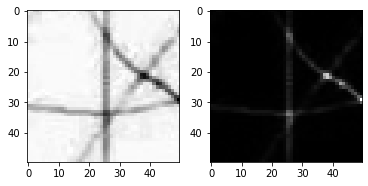

In [6]:
Data = sio.loadmat('Data.mat') # une partie de l'image originale
DataMod = sio.loadmat('DataMod.mat') # cette même partie de l'image modifée par la transformation T avec bruit additif

Data=np.asarray(Data['Data'])
DataMod=np.asarray(DataMod['DataMod'])
print(Data.shape) # dimension de la partie commune image originale et modifiée

fig = plt.figure(12)
ax1 = plt.subplot(1, 2, 1)
plt.imshow(Data, cmap='gray')
ax2=plt.subplot(1, 2, 2)
plt.imshow(DataMod, cmap='gray')
print()

In [17]:
n,m = Data.shape
A=Data.reshape(n*m,1)
A=np.hstack((A,np.ones((n*m,1))))
Y=np.log(DataMod.reshape((n*m,1)))
print(A)
print(Y)

[[0.95703125 1.        ]
 [0.92578125 1.        ]
 [0.83984375 1.        ]
 ...
 [0.984375   1.        ]
 [0.984375   1.        ]
 [0.98046875 1.        ]]
[[-4.79763216]
 [-4.64215887]
 [-4.2187009 ]
 ...
 [-4.92416051]
 [-4.92671877]
 [-4.9103923 ]]


In [21]:
A_inv=np.linalg.pinv(A.T.dot(A))
B= (A_inv.dot(A.T)).dot(Y)
print(B)

[[ 0.00138747  0.0001963  -0.00307941 ...  0.00242975  0.00242975
   0.00228085]
 [-0.00087735  0.00021928  0.003235   ... -0.0018369  -0.0018369
  -0.00169982]]
[[-4.99985886]
 [-0.01029862]]


### Question 3 :
Déduire de la question 1 la fonction à appliquer pour reconstruire l'image.

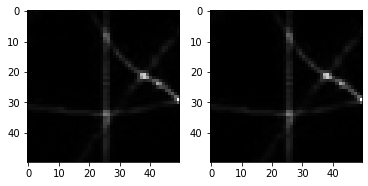

In [28]:
new_J= np.exp(A.dot(B))
new_J=new_J.reshape((n,m))

fig = plt.figure(12)
ax1 = plt.subplot(1, 2, 1)
plt.imshow(DataMod, cmap='gray')
ax2=plt.subplot(1, 2, 2)
plt.imshow(new_J, cmap='gray')

### Question 4 :
A partir des paramètres estimés et de l'image entière modifiée *ImMod.mat*, codez la reconstruction de l'image originale.

(493, 718)


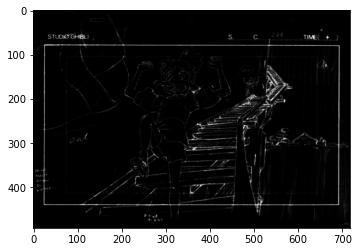

In [37]:
ImMod = sio.loadmat('ImMod.mat') # image entière modifiée
ImMod=np.asarray(ImMod['ImMod'])
print(ImMod.shape) # dimension de l'image entière
plt.imshow(ImMod,cmap='gray')

n,m = ImMod.shape
Y=np.log(ImMod.reshape((n*m,1)))
A=Y.dot(np.linalg.pinv(B)).reshape((n,m,2))
A=A[:,:,:1]


In [40]:
plt.imshow(A,cmap='gray')
print()

# Quizz Studio Ghibli 

D'autres images à reconstruire vous sont proposées. 

Créez une fonction des étapes précédentes pour reconstruire l'image et testez vos connaissances sur les films de Hayao Miyazaki et Isao Takahata.


In [56]:
def afficherImage(n):
    data = sio.loadmat(f'QuizzStudioGhibli/SG{n}/ImModSG{n}.mat') # image entière modifiée
    data=np.asarray(data['ImMod'])
    n,m = data.shape
    Y=np.log(data.reshape((n*m,1)))
    A=Y.dot(np.linalg.pinv(B)).reshape((n,m,2))
    A=A[:,:,:1]
    plt.imshow(A,cmap='gray')
    return A


In [58]:
A=afficherImage(2)

In [59]:
A=afficherImage(3)

In [60]:
A=afficherImage(4)

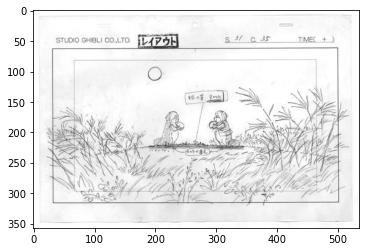

In [61]:
A=afficherImage(5)

In [62]:
A=afficherImage(6)